In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

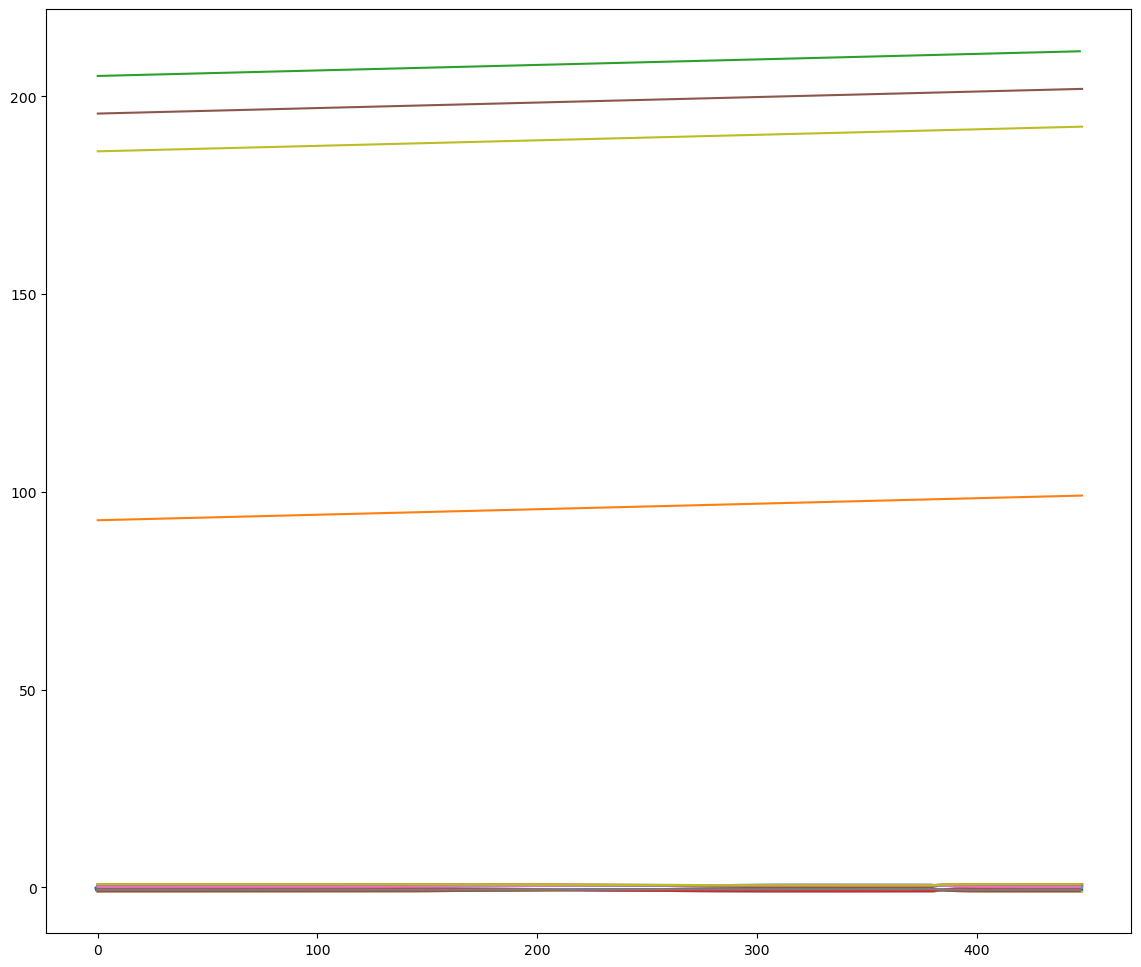

In [113]:
# folderpath = "C:\\Users\\jmoln\\Documents\\Projects\\HandsLoggerWithURDF\\HandsLoggerWithURDF\\Assets\\URDF\\reachy_description\\gestures\\"
#folderpath = "C:\\Users\\jmoln\\Documents\\Projects\\HandsLoggerWithURDF\\HandsLoggerWithURDF\\Assets\\URDF\\kinova_description\\gestures\\"
folderpath = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\"

pid = 13

robot = ("Reachy", "j2s6s300")

jaco_data_file = ("j2s6s300_end_effector_Motion","JointMotion","Main Camera_Motion","RightHand Controller_Motion","LeftHand Controller_Motion")

filepath_endeff = folderpath + "PID" + str(pid) + "\\" + robot[1]+"_PID"+str(pid)+"_"+jaco_data_file[0]
filepath_joints = folderpath + "PID" + str(pid) + "\\" + robot[1]+"_PID"+str(pid)+"_"+jaco_data_file[1]
filepath_camera = folderpath + "PID" + str(pid) + "\\" + robot[1]+"_PID"+str(pid)+"_"+jaco_data_file[2]
filepath_rh     = folderpath + "PID" + str(pid) + "\\" + robot[1]+"_PID"+str(pid)+"_"+jaco_data_file[3]
filepath_lh     = folderpath + "PID" + str(pid) + "\\" + robot[1]+"_PID"+str(pid)+"_"+jaco_data_file[4]


for gest_num in range(1,2): #Just one gesture for now
    demo_num = 1
    
    fig, ax = plt.subplots(figsize=(15, 10))
    # Show the border and axes ticks
    fig.patch.set_visible(True)
    ax = plt.axes(projection='3d')
    ax.axis('on')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='z', labelsize=10)
    # ax.view_init(-140, 20)

    endeff_pos = np.loadtxt(filepath_endeff+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
    joints_pos = np.loadtxt(filepath_joints+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str,usecols=(0,1,2,3,4,5,6))
    camera_pos = np.loadtxt(filepath_camera+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
    rh_pos     = np.loadtxt(filepath_rh    +"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
    lh_pos     = np.loadtxt(filepath_lh    +"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
    
    endeff_pos = endeff_pos[1:].astype(float)
    joints_pos = joints_pos[1:].astype(float)
    camera_pos = camera_pos[1:].astype(float)
    rh_pos = lh_pos[1:].astype(float)
    lh_pos = lh_pos[1:].astype(float)
    
    
    
    for demo_num in range(2,6): #want to make this go up to the max number that are saved
        endeff_pos_temp = np.loadtxt(filepath_endeff+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
        joints_pos_temp = np.loadtxt(filepath_joints+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str,usecols=(0,1,2,3,4,5,6))
        camera_pos_temp = np.loadtxt(filepath_camera+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
        rh_pos_temp     = np.loadtxt(filepath_rh    +"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
        lh_pos_temp     = np.loadtxt(filepath_lh    +"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
        
        endeff_pos_temp = endeff_pos_temp[1:].astype(float)
        joints_pos_temp = joints_pos_temp[1:].astype(float)
        camera_pos_temp = camera_pos_temp[1:].astype(float)
        rh_pos_temp     = rh_pos_temp[1:].astype(float)
        lh_pos_temp     = lh_pos_temp[1:].astype(float)
        
        ax.scatter(y_test[:].T[3*i+0]   , y_test[:].T[3*i+2]   , y_test[:].T[3*i+1],c='skyblue',label='Ground-truth')   #, c=time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand orientation')
        ax.scatter(pred_vals[:].T[3*i+0], pred_vals[:].T[3*i+2], pred_vals[:].T[3*i+1],c='lightcoral',label='Predicted') #, c=time_URDF_aligned/max(time_URDF_aligned), cmap='Reds', label='End-effector orientation')
        ax.scatter(pred_vals[:].T[3*i+0], pred_vals[:].T[3*i+2], pred_vals[:].T[3*i+1],c='lightcoral', alpha = 0.75, s=std_vals*2)
        ax.legend(loc='lower right',fontsize=14)

        
        endeff_pos = endeff_pos,endeff_pos_temp
        joints_pos = joints_pos,joints_pos_temp
        camera_pos = camera_pos,camera_pos_temp
        rh_pos     = rh_pos,    rh_pos_temp
        lh_pos     = lh_pos,    lh_pos_temp
        

In [4]:
    print(camera_pos.size())
    
    f = plt.figure(figsize=[14.0, 12.0])

    ax = f.add_subplot(111)
    labels = ('X','Y','Z')
    # labels = ('X Position','Y Position','Z Position', 'X Orientation', 'Y Orientation', 'Z Orientation')

    for i in range(0,6):
        ax.plot(y_test[:,i],'--',label='True '+labels[i]+' angle')

    for i in range(0,6):
        ax.plot(pred_vals[:,i]) #,label='Pred Pos '+labels[i])

    for i in range(0,6):
        plt.fill_between(
            range(0,std_vals.shape[0]),
            pred_vals[:,i] - 1.96 * std_vals[:,i],
            pred_vals[:,i] + 1.96 * std_vals[:,i],
            alpha=0.5,
            label=r"95% confidence interval for "+ labels[i],
        )

    ax.set_xlabel('X');
    ax.set_ylabel('Y');
    ax.set_title('Predicted vs actual end-effector DOF');
    ax.legend();

SyntaxError: unterminated string literal (detected at line 5) (1153533504.py, line 5)

In [91]:
gest_num = 1
demo_num = 1
endeff_pos = np.loadtxt(filepath_endeff+"_gesture_"+str(gest_num)+"_"+str(demo_num)+".csv",delimiter =',',dtype=str)
endeff_pos = endeff_pos[1:].astype(float)

endeff_pos_temp = np.loadtxt(filepath_endeff+"_gesture_"+str(gest_num)+"_"+str(2)+".csv",delimiter =',',dtype=str)
endeff_pos_temp = endeff_pos_temp[1:].astype(float)

In [109]:
lh_pos[0][0][0][0]

array([[79.63149  ,  0.2247187,  1.107292 , ..., -0.162317 , -0.9206547,
         0.1336844],
       [79.65202  ,  0.2242844,  1.107193 , ..., -0.1656667, -0.9196594,
         0.1341557],
       [79.65952  ,  0.2237748,  1.107178 , ..., -0.1676954, -0.9190744,
         0.1338167],
       ...,
       [85.84253  ,  0.209549 ,  1.104653 , ..., -0.1241908, -0.9573436,
         0.1803246],
       [85.85642  ,  0.2091636,  1.105137 , ..., -0.1231393, -0.9578159,
         0.1799888],
       [85.87054  ,  0.2088656,  1.105556 , ..., -0.1229243, -0.9581962,
         0.1795809]])

In [95]:
temp_array

[array([[ 7.963149e+01, -6.400409e-02,  5.184398e-01, ...,  1.473858e-01,
         -5.477748e-01,  8.226563e-01],
        [ 7.965202e+01, -6.400390e-02,  5.184402e-01, ...,  1.473859e-01,
         -5.477751e-01,  8.226562e-01],
        [ 7.965952e+01, -6.400390e-02,  5.184402e-01, ...,  1.473859e-01,
         -5.477751e-01,  8.226562e-01],
        ...,
        [ 8.584253e+01, -6.437243e-02,  5.138478e-01, ...,  1.472217e-01,
         -5.451630e-01,  8.244686e-01],
        [ 8.585642e+01, -6.437243e-02,  5.138478e-01, ...,  1.472217e-01,
         -5.451630e-01,  8.244686e-01],
        [ 8.587054e+01, -6.433574e-02,  5.136471e-01, ...,  1.471808e-01,
         -5.450572e-01,  8.245471e-01]]),
 array([[ 9.283087e+01, -6.400328e-02,  5.184571e-01, ...,  1.473870e-01,
         -5.477846e-01,  8.226497e-01],
        [ 9.284489e+01, -6.400328e-02,  5.184571e-01, ...,  1.473870e-01,
         -5.477846e-01,  8.226497e-01],
        [ 9.285889e+01, -6.400328e-02,  5.184571e-01, ...,  1.473870e-01,

In [3]:
dir_list = os.listdir(folderpath)

for PID_folder in dir_list:
    if (PID_folder=='Questionnaire'):
        continue
    # if (text_file[0:3]=='new'):
    #     continue
    # if (text_file[-5:]==".meta"):
    #     continue
    # if (text_file[-4:]==".txt"):
    #     # continue
    else:
        
        positions = np.loadtxt(folderpath+text_file,delimiter ='[',dtype=str)
        #print(positions)
        print(text_file)
        np.savetxt(folderpath+'new'+text_file,positions[:,1],fmt='%s')
        positions = np.loadtxt(folderpath+'new'+text_file,delimiter = ']',dtype=str)
        np.savetxt(folderpath+'new'+text_file,positions[:,0],fmt='%s')
        positions = np.loadtxt(folderpath+'new'+text_file,delimiter = ',',dtype=str)
        filenamecsv = text_file[0:-4]
        #print(filenamecsv)
        np.savetxt(folderpath+'new'+filenamecsv+'.csv',positions,delimiter=',',fmt='%s')
        if os.path.exists(folderpath+'new'+text_file):
            os.remove(folderpath+'new'+text_file)
        else:
            print("The file does not exist") 
        
        #print(positions)
    
# Import data from csvs
#positions = pd.read_csv(filename)

SyntaxError: unterminated string literal (detected at line 18) (3370397135.py, line 18)

In [61]:
text_file[-5:]

'.meta'

In [20]:
os.listdir(folderpath)

['Experimental Gesture Set',
 'j2s6s300_corrected_positions_1.csv',
 'j2s6s300_corrected_positions_10.csv',
 'j2s6s300_corrected_positions_11.csv',
 'j2s6s300_corrected_positions_12.csv',
 'j2s6s300_corrected_positions_13.csv',
 'j2s6s300_corrected_positions_14.csv',
 'j2s6s300_corrected_positions_15.csv',
 'j2s6s300_corrected_positions_16.csv',
 'j2s6s300_corrected_positions_17.csv',
 'j2s6s300_corrected_positions_18.csv',
 'j2s6s300_corrected_positions_19.csv',
 'j2s6s300_corrected_positions_2.csv',
 'j2s6s300_corrected_positions_20.csv',
 'j2s6s300_corrected_positions_21.csv',
 'j2s6s300_corrected_positions_3.csv',
 'j2s6s300_corrected_positions_4.csv',
 'j2s6s300_corrected_positions_5.csv',
 'j2s6s300_corrected_positions_6.csv',
 'j2s6s300_corrected_positions_7.csv',
 'j2s6s300_corrected_positions_8.csv',
 'j2s6s300_corrected_positions_9.csv',
 'jaco_1DOF_link1.txt',
 'jaco_1DOF_link2.txt',
 'jaco_1DOF_link3.txt',
 'jaco_1DOF_link4Arev.txt',
 'jaco_1DOF_link4B.txt',
 'jaco_1DOF_lin